#### To build this project, used Keras and pandas. Also, used ResNet architecture for classifying the chest X-ray

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

### Setting the dataset path

In [2]:
DATA_PATH = "./Dataset"

if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    print("Dataset folder created")

In [3]:
TRAIN_PATH = "./Dataset/train"
VAL_PATH = "./Dataset/test"

In [4]:


import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.applications import ResNet50


In [5]:

TRAIN_COVID_PATH = "./Dataset/train/COVID19"
TRAIN_NORMAL_PATH = "./Dataset/train/NORMAL"
TRAIN_PNE_PATH = "./Dataset/train/PNEUMONIA"


VAL_NORMAL_PATH = "./Dataset/test/NORMAL"
VAL_PNEU_PATH = "./Dataset/test/PNEUMONIA"
VAL_COVID_PATH = "./Dataset/test/COVID19"

### Data Generator

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
   # shear_range = 0.2,
   # zoom_range = 0.2,
    #horizontal_flip = True,
)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 5144 images belonging to 3 classes.


In [7]:


train_generator.class_indices



{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [8]:
validation_generator = test_datagen.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 1288 images belonging to 3 classes.


In [9]:
epochs = 100
stepsperepoch=9
validationsteps=1

In [10]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

In [11]:
input_t = Input(shape=(224, 224, 3))

### Build Model

In [12]:
model = ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

In [13]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:


hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)



C:\Users\supriti.ghosh\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
9/9 [==============================] - 105s 11s/step - loss: 3.7802 - accuracy: 0.5355 - val_loss: 1.1644 - val_accuracy: 0.6250

Epoch 00001: val_loss improved from inf to 1.16442, saving model to own.h5
Epoch 2/100
9/9 [==============================] - 94s 10s/step - loss: 1.2099 - accuracy: 0.5975 - val_loss: 1.3294 - val_accuracy: 0.6875

Epoch 00002: val_loss did not improve from 1.16442
Epoch 3/100
9/9 [==============================] - 94s 10s/step - loss: 0.7173 - accuracy: 0.7323 - val_loss: 1.7836 - val_accuracy: 0.1875

Epoch 00003: val_loss did not improve from 1.16442
Epoch 4/100
9/9 [==============================] - 94s 10s/step - loss: 0.5713 - accuracy: 0.7665 - val_loss: 1.2736 - val_accuracy: 0.7500

Epoch 00004: val_loss did not improve from 1.16442
Epoch 5/100
9/9 [==============================] - 96s 11s/step - loss: 0.6909 - accuracy: 0.6976 - val_loss: 1.0751 - val_accuracy: 0.6875

Epoch 00005: val_loss improved from 1.16442 to 1.07508, saving mod

Epoch 25/100
9/9 [==============================] - 100s 11s/step - loss: 0.3422 - accuracy: 0.8892 - val_loss: 3.9915 - val_accuracy: 0.6875

Epoch 00025: val_loss did not improve from 1.07508
Epoch 26/100
9/9 [==============================] - 94s 10s/step - loss: 0.2542 - accuracy: 0.8797 - val_loss: 5.5322 - val_accuracy: 0.5938

Epoch 00026: val_loss did not improve from 1.07508
Epoch 27/100
9/9 [==============================] - 95s 10s/step - loss: 0.2008 - accuracy: 0.9433 - val_loss: 5.1523 - val_accuracy: 0.5625

Epoch 00027: val_loss did not improve from 1.07508
Epoch 28/100
9/9 [==============================] - 97s 11s/step - loss: 0.1267 - accuracy: 0.9437 - val_loss: 3.5773 - val_accuracy: 0.6562

Epoch 00028: val_loss did not improve from 1.07508
Epoch 29/100
9/9 [==============================] - 94s 10s/step - loss: 0.3285 - accuracy: 0.8871 - val_loss: 3.0004 - val_accuracy: 0.7188

Epoch 00029: val_loss did not improve from 1.07508
Epoch 30/100
9/9 [================

Epoch 49/100
9/9 [==============================] - 93s 10s/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 1.6177 - val_accuracy: 0.7812

Epoch 00049: val_loss did not improve from 1.07508
Epoch 50/100
9/9 [==============================] - 92s 10s/step - loss: 0.1505 - accuracy: 0.9506 - val_loss: 1.5724 - val_accuracy: 0.7188

Epoch 00050: val_loss did not improve from 1.07508
Epoch 51/100
9/9 [==============================] - 91s 10s/step - loss: 0.0890 - accuracy: 0.9575 - val_loss: 1.0839 - val_accuracy: 0.7188

Epoch 00051: val_loss did not improve from 1.07508
Epoch 52/100
9/9 [==============================] - 92s 10s/step - loss: 0.0691 - accuracy: 0.9705 - val_loss: 2.2045 - val_accuracy: 0.6875

Epoch 00052: val_loss did not improve from 1.07508
Epoch 53/100
9/9 [==============================] - 92s 10s/step - loss: 0.0756 - accuracy: 0.9602 - val_loss: 1.9683 - val_accuracy: 0.6875

Epoch 00053: val_loss did not improve from 1.07508
Epoch 54/100
9/9 [=================


Epoch 00095: val_loss did not improve from 0.03931
Epoch 96/100
9/9 [==============================] - 91s 10s/step - loss: 0.0349 - accuracy: 0.9812 - val_loss: 0.0997 - val_accuracy: 0.9688

Epoch 00096: val_loss did not improve from 0.03931
Epoch 97/100
9/9 [==============================] - 91s 10s/step - loss: 0.0172 - accuracy: 0.9969 - val_loss: 0.3169 - val_accuracy: 0.9062

Epoch 00097: val_loss did not improve from 0.03931
Epoch 98/100
9/9 [==============================] - 91s 10s/step - loss: 0.0376 - accuracy: 0.9872 - val_loss: 0.0937 - val_accuracy: 0.9688

Epoch 00098: val_loss did not improve from 0.03931
Epoch 99/100
9/9 [==============================] - 92s 10s/step - loss: 0.0568 - accuracy: 0.9904 - val_loss: 0.2093 - val_accuracy: 0.9688

Epoch 00099: val_loss did not improve from 0.03931
Epoch 100/100
9/9 [==============================] - 91s 10s/step - loss: 0.0549 - accuracy: 0.9721 - val_loss: 0.2600 - val_accuracy: 0.9062

Epoch 00100: val_loss did not imp

In [16]:
preds = model.evaluate(validation_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

41/41 [==============================] - 59s 1s/step - loss: 0.1557 - accuracy: 0.9495
Validation Loss = 0.155660018324852
Validation Accuracy = 0.9495341777801514


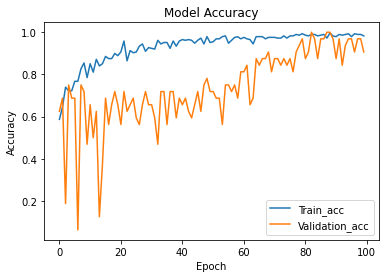

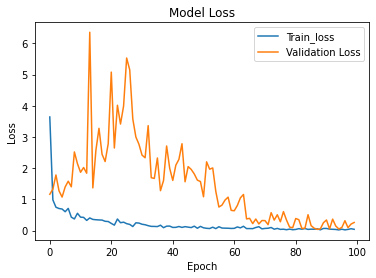

In [17]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

